In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

transactions_fpath = '../data/comscore/2017/transactions.csv'

In [9]:
transactions_df = pd.read_csv(transactions_fpath)
transactions_df.columns

/Users/aberke/projects/CSL_Andorra_COVID_Public/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['machine_id', 'site_session_id', 'prod_category_id', 'prod_name',
       'domain_id', 'prod_qty', 'prod_totprice', 'basket_tot', 'event_date',
       'event_time', 'hoh_most_education', 'census_region', 'household_size',
       'hoh_oldest_age', 'household_income', 'children', 'racial_background',
       'connection_speed', 'country_of_origin', 'zip_code', 'domain_name'],
      dtype='object')

In [24]:
print('%s unique machine ids'%transactions_df['machine_id'].nunique())
print('transactions per machine id:')
print(transactions_df['machine_id'].value_counts().rename('transactions').to_frame()['transactions'].describe())
transaction_per_machine_id = transactions_df['machine_id'].value_counts().values
transaction_per_machine_id.sort()
transaction_per_machine_id

19282 unique machine ids
transactions per machine id:
count    19282.000000
mean         5.970750
std         14.048549
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       1311.000000
Name: transactions, dtype: float64


array([   1,    1,    1, ...,  240,  415, 1311])

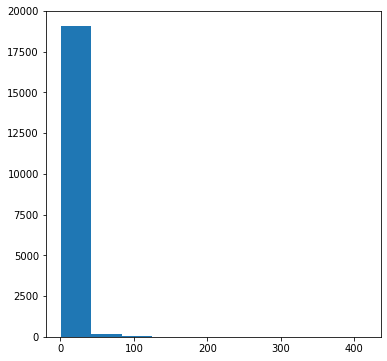

In [30]:
# plot without that crazy outlier
fig, ax = plt.subplots(1,1,figsize=(6,6))
_ = ax.hist(transaction_per_machine_id[:-1])

In [7]:
transactions_df['domain_name'].nunique()

207